In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pypoman
import scipy.spatial
import polytope
import torch

import pynever.strategies.abstraction as abst
import pynever.nodes as nodes
import pynever.strategies.verification as ver
import pynever.networks as networks
import pynever.utilities as utils
import pynever.strategies.conversion as conv


def plot_star(p_star: abst.Star, show=False, title=None, color = np.array([0.5, 0.5, 1])):

    #color = np.random.rand(3)
    alpha_vertexes = pypoman.compute_polytope_vertices(p_star.predicate_matrix, p_star.predicate_bias)
    x_vertexes = []
    for v in alpha_vertexes:
        v_ver = np.zeros((v.shape[0], 1))
        for k in range(v.shape[0]):
            v_ver[k, 0] = v[k]
        new_x_v = p_star.center + np.matmul(p_star.basis_matrix, v_ver)
        x_vertexes.append(new_x_v)

    x1_plot = []
    x2_plot = []
    for v in x_vertexes:
        x1_plot.append(v[0, 0])
        x2_plot.append(v[1, 0])

    for k in range(len(x1_plot)):
        for j in range(len(x1_plot)):
            plt.plot([x1_plot[k], x1_plot[j]], [x2_plot[k], x2_plot[j]], color=color)

    plt.scatter(x1_plot, x2_plot, color=color)
    if show:
        if title is not None:
            plt.title(title)
        plt.grid()


def plot_starset(p_starset: abst.StarSet, title, color = np.array([0.5, 0.5, 1])):
    for p_star in p_starset.stars:

        plot_star(p_star, color=color)

    if title is not None:
        plt.title(title)
    plt.grid()


def get_star_extreme_points(p_star: abst.Star):

    x_vertexes = []
    alpha_vertexes = pypoman.compute_polytope_vertices(p_star.predicate_matrix, p_star.predicate_bias)
    for v in alpha_vertexes:
        v_ver = np.zeros((v.shape[0], 1))
        for k in range(v.shape[0]):
            v_ver[k, 0] = v[k]
        new_x_v = p_star.center + np.matmul(p_star.basis_matrix, v_ver)
        new_x_v = np.array([new_x_v[0, 0], new_x_v[1, 0]])
        x_vertexes.append(new_x_v)

    x_vertexes = np.array(x_vertexes)

    return x_vertexes

def get_starset_extreme_points(p_starset: abst.StarSet):
    x_vertexes = []
    for p_star in p_starset.stars:
        alpha_vertexes = pypoman.compute_polytope_vertices(p_star.predicate_matrix, p_star.predicate_bias)
        for v in alpha_vertexes:
            v_ver = np.zeros((v.shape[0], 1))
            for k in range(v.shape[0]):
                v_ver[k, 0] = v[k]
            new_x_v = p_star.center + np.matmul(p_star.basis_matrix, v_ver)
            new_x_v = np.array([new_x_v[0, 0], new_x_v[1, 0]])
            x_vertexes.append(new_x_v)

    x_vertexes = np.array(x_vertexes)
    return x_vertexes


def plot_convex_hull(points: np.ndarray, title = None, color=None, alpha=1, label=None):

    hull = scipy.spatial.ConvexHull(points)
    vertexes = points[hull.vertices, :]
    vertexes = np.vstack((vertexes, vertexes[0, :]))
    if color is None:
        plt.fill(vertexes[:, 0], vertexes[:, 1], alpha=0.5, label=label)
    else:
        plt.fill(vertexes[:, 0], vertexes[:, 1], color=color, alpha=alpha, label=label)
    
    if title is not None:
        plt.title(title)
    plt.grid()


def print_star_data(p_star: abst.Star):

    print("PREDICATE CONSTRAINTS:")
    for row in range(p_star.predicate_matrix.shape[0]):
        constraint = ""
        for col in range(p_star.predicate_matrix.shape[1]):
            if p_star.predicate_matrix[row, col] < 0:
                sign = "-"
            else:
                sign = "+"
            constraint = constraint + f"{sign} {abs(p_star.predicate_matrix[row, col])} * x_{col} "

        constraint = constraint + f"<= {p_star.predicate_bias[row, 0]}"
        print(constraint)

    print("VARIABLES EQUATIONS:")
    for row in range(p_star.basis_matrix.shape[0]):
        equation = f"z_{row} = "
        for col in range(p_star.basis_matrix.shape[1]):
            if p_star.basis_matrix[row, col] < 0:
                sign = "-"
            else:
                sign = "+"
            equation = equation + f"{sign} {abs(p_star.basis_matrix[row, col])} * x_{col} "

        if p_star.center[row, 0] < 0:
            c_sign = "-"
        else:
            c_sign = "+"
        equation = equation + f"{c_sign} {abs(p_star.center[row, 0])}"
        print(equation)


FC_NET_1_1_1_1

INPUT STARS


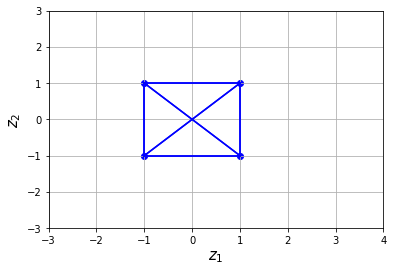

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 1.0 * x_1 + 0.0

INPUT STARSET


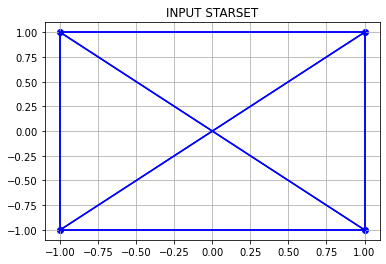

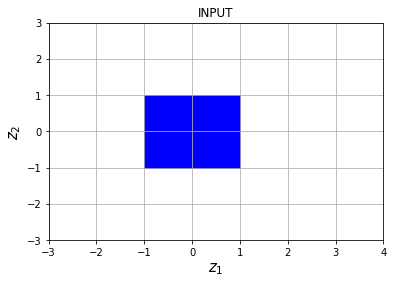



CURRENT NODE: AbsFC_1
WEIGHTS: [[ 1.  1.]
 [ 1. -1.]]
BIAS: [0. 0.]

STARS


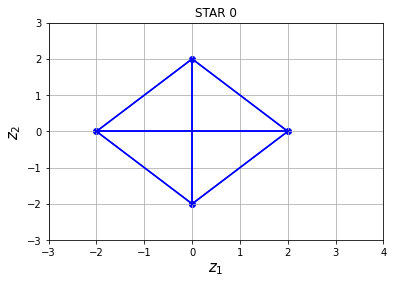

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 1.0 * x_1 + 0.0
z_1 = + 1.0 * x_0 - 1.0 * x_1 + 0.0
1

STARSET


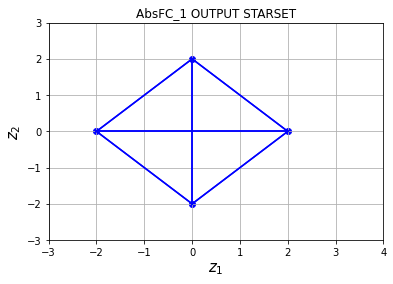

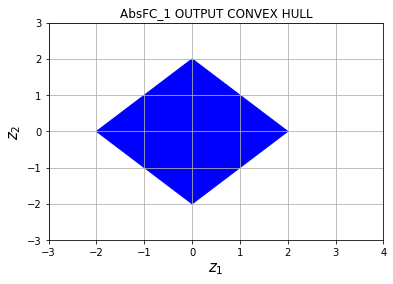



CURRENT NODE: AbsReLU_1

STARS


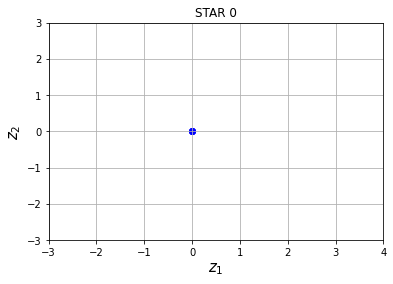

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
+ 1.0 * x_0 + 1.0 * x_1 <= -0.0
+ 1.0 * x_0 - 1.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0


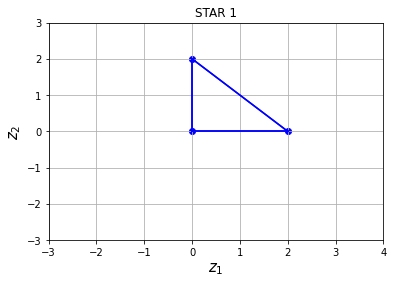

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 1.0 * x_1 + 0.0
z_1 = + 1.0 * x_0 - 1.0 * x_1 + 0.0


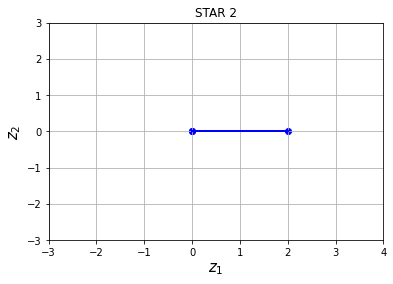

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
+ 1.0 * x_0 - 1.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 1.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0


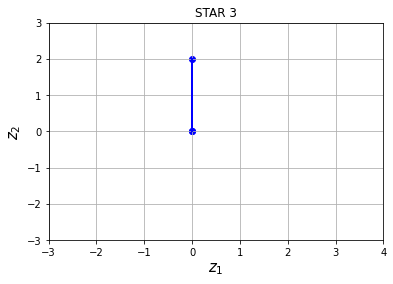

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
+ 1.0 * x_0 + 1.0 * x_1 <= -0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 1.0 * x_0 - 1.0 * x_1 + 0.0
4

STARSET


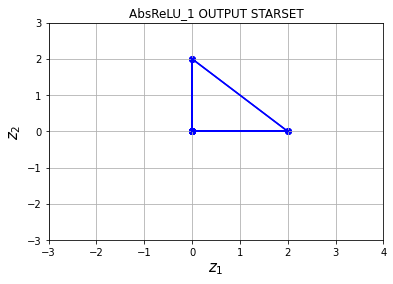

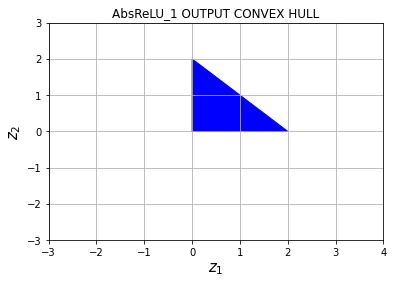



CURRENT NODE: AbsFC_2
WEIGHTS: [[ 1.  1.]
 [ 1. -1.]]
BIAS: [0. 0.]

STARS


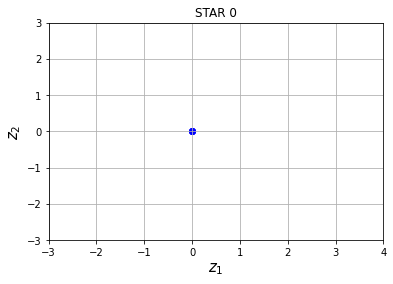

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
+ 1.0 * x_0 + 1.0 * x_1 <= -0.0
+ 1.0 * x_0 - 1.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0


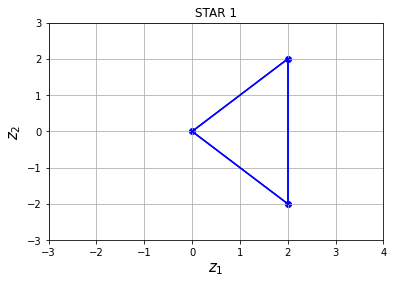

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
VARIABLES EQUATIONS:
z_0 = + 2.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 2.0 * x_1 + 0.0


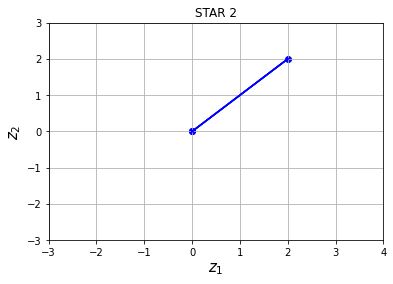

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
+ 1.0 * x_0 - 1.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 1.0 * x_1 + 0.0
z_1 = + 1.0 * x_0 + 1.0 * x_1 + 0.0


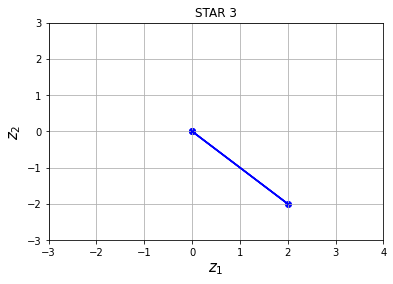

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
+ 1.0 * x_0 + 1.0 * x_1 <= -0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 - 1.0 * x_1 + 0.0
z_1 = - 1.0 * x_0 + 1.0 * x_1 + 0.0
4

STARSET


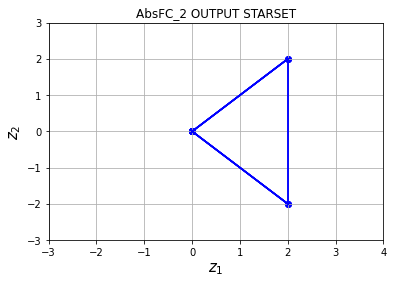

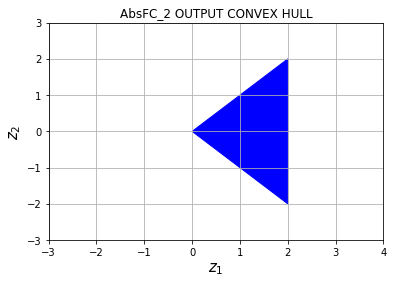



CURRENT NODE: AbsReLU_2

STARS


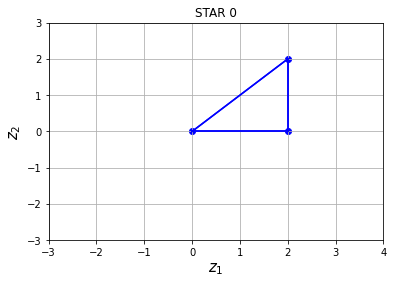

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
+ 0.0 * x_0 - 2.0 * x_1 <= 0.0
VARIABLES EQUATIONS:
z_0 = + 2.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 2.0 * x_1 + 0.0


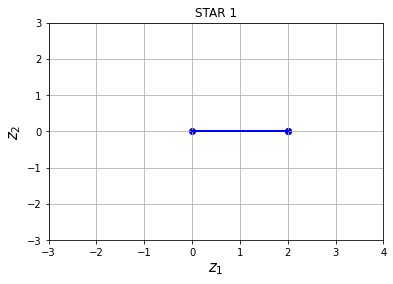

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
+ 0.0 * x_0 + 2.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 2.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0


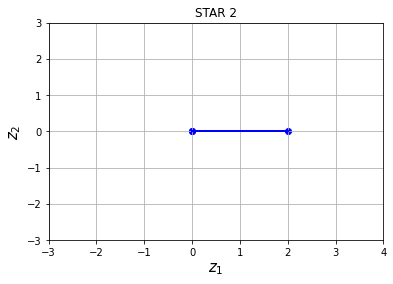

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
+ 1.0 * x_0 + 1.0 * x_1 <= -0.0
- 1.0 * x_0 + 1.0 * x_1 <= 0.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 - 1.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0


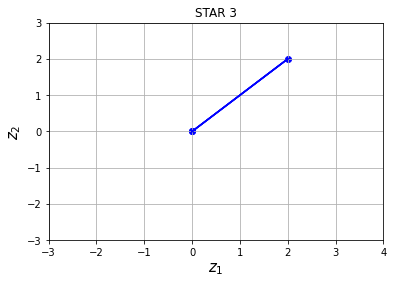

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
- 1.0 * x_0 - 1.0 * x_1 <= 0.0
+ 1.0 * x_0 - 1.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 1.0 * x_1 + 0.0
z_1 = + 1.0 * x_0 + 1.0 * x_1 + 0.0


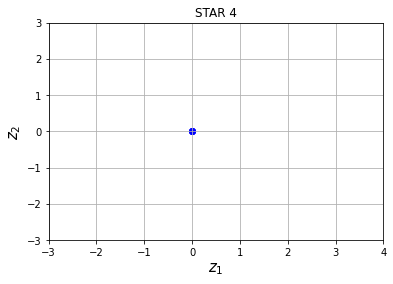

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
+ 1.0 * x_0 + 1.0 * x_1 <= -0.0
+ 1.0 * x_0 - 1.0 * x_1 <= -0.0
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0
5

STARSET


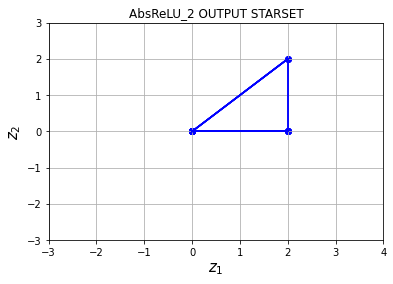

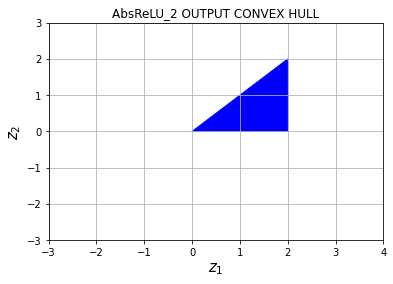

In [2]:
# Bidimensional Example with abstract verification
fill_color = 'blue'

weight_matrix_1 = np.ones((2, 2))
weight_matrix_2 = np.ones((2, 2))

weight_matrix_1[1, 1] = -1
weight_matrix_2[1, 1] = -1

bias_1 = np.zeros(2)
bias_2 = np.zeros(2)

net_names = ["FC_NET_1_1_1_1"]

neuron_relevance = True
refinement_percentage = 1

final_concrete_hulls = []
for i in range(len(net_names)):

    print("\n" + net_names[i] + "\n")

    abs_net = abst.AbsSeqNetwork(net_names[i])

    abs_net.add_node(
        abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

    abs_net.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "best_n_neurons", [10]))

    abs_net.add_node(
        abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

    abs_net.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "best_n_neurons", [10]))

    C = np.zeros((4, 2))
    C[0, 0] = 1
    C[1, 0] = -1
    C[2, 1] = 1
    C[3, 1] = -1

    d = np.ones((4, 1))
    d[0, 0] = 1
    d[1, 0] = 1
    d[2, 0] = 1
    d[3, 0] = 1

    star = abst.Star(C, d)
    abs_input = abst.StarSet({star})
    in_starset = abst.StarSet({star})
    current_node = abs_net.get_first_node()

    print("INPUT STARS")
    for star in abs_input.stars:
        plot_star(star, show=True, color=fill_color)
        plt.xlabel("$z_1$", size=15)
        plt.ylabel("$z_2$", size=15)
        plt.xlim([-3,4])
        plt.ylim([-3,3])
        plt.show()
        print_star_data(star)

    print("\nINPUT STARSET")
    plot_starset(abs_input, "INPUT STARSET", color=fill_color)
    plt.show()
    plot_convex_hull(get_starset_extreme_points(abs_input), "INPUT", color=fill_color)
    plt.xlim([-3,4])
    plt.ylim([-3,3])
    plt.xlabel("$z_1$", size=15)
    plt.ylabel("$z_2$", size=15)
    plt.savefig("complete_input.pdf")
    plt.show()

    while current_node is not None:
        print(f"\n\nCURRENT NODE: {current_node.identifier}")
        if isinstance(current_node.ref_node, nodes.FullyConnectedNode):
            print(f"WEIGHTS: {current_node.ref_node.weight}")
            print(f"BIAS: {current_node.ref_node.bias}")

        abs_input = current_node.forward_star(abs_input)
        print("\nSTARS")
        n_star = 0
        for star in abs_input.stars:
            plot_star(star, show=True, title=f"STAR {n_star}", color=fill_color)
            plt.xlim([-3,4])
            plt.ylim([-3,3])
            plt.xlabel("$z_1$", size=15)
            plt.ylabel("$z_2$", size=15)
            plt.savefig(f"complete_{current_node.identifier}_STAR={n_star}.pdf")
            plt.show()
            print_star_data(star)
            n_star += 1
        print(n_star)

        print("\nSTARSET")
        plot_starset(abs_input, current_node.identifier + " OUTPUT STARSET", color=fill_color)
        plt.xlim([-3,4])
        plt.ylim([-3,3])
        plt.xlabel("$z_1$", size=15)
        plt.ylabel("$z_2$", size=15)
        plt.show()
        plot_convex_hull(get_starset_extreme_points(abs_input), 
                         current_node.identifier + " OUTPUT CONVEX HULL", color=fill_color)
        plt.xlim([-3,4])
        plt.ylim([-3,3])
        plt.xlabel("$z_1$", size=15)
        plt.ylabel("$z_2$", size=15)
        plt.savefig(f"complete_chull_{current_node.identifier}.pdf")
        plt.show()
        final_concrete_hulls.append(get_starset_extreme_points(abs_input))
        current_node = abs_net.get_next_node(current_node)


FC_NET_1_1_1_1

INPUT STARS


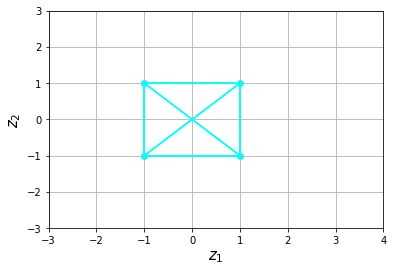

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 1.0 * x_1 + 0.0

INPUT STARSET


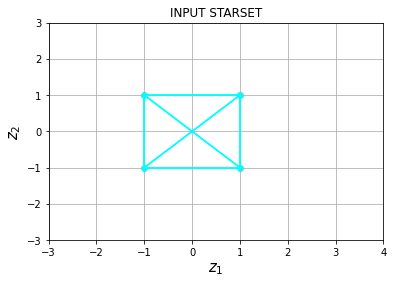

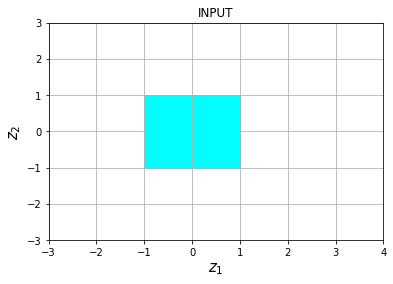



CURRENT NODE: AbsFC_1
WEIGHTS: [[ 1.  1.]
 [ 1. -1.]]
BIAS: [0. 0.]

STARS


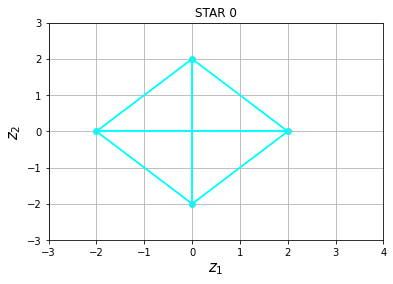

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 1.0 * x_1 + 0.0
z_1 = + 1.0 * x_0 - 1.0 * x_1 + 0.0

STARSET


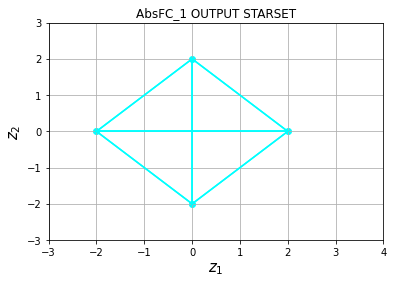

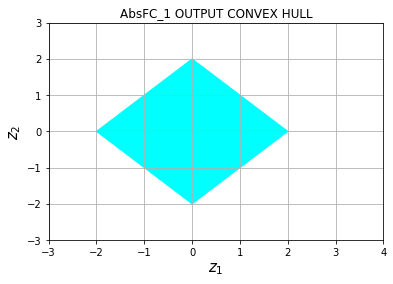



CURRENT NODE: AbsReLU_1

STARS


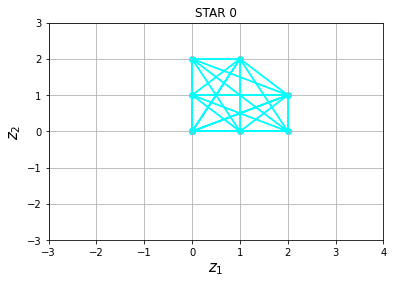

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 - 1.0 * x_2 + 0.0 * x_3 <= 0.0
+ 1.0 * x_0 + 1.0 * x_1 - 1.0 * x_2 + 0.0 * x_3 <= -0.0
- 0.5 * x_0 - 0.5 * x_1 + 1.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 - 1.0 * x_3 <= 0.0
+ 1.0 * x_0 - 1.0 * x_1 + 0.0 * x_2 - 1.0 * x_3 <= -0.0
- 0.5 * x_0 + 0.5 * x_1 + 0.0 * x_2 + 1.0 * x_3 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 1.0 * x_2 + 0.0 * x_3 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 1.0 * x_3 + 0.0

STARSET


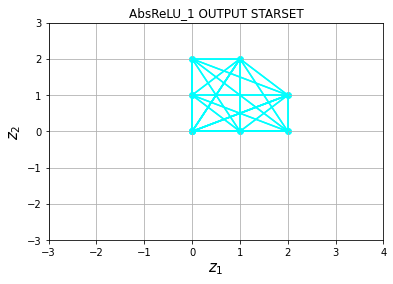

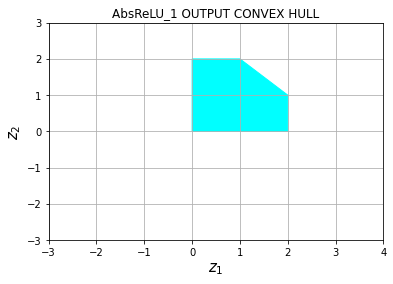



CURRENT NODE: AbsFC_2
WEIGHTS: [[ 1.  1.]
 [ 1. -1.]]
BIAS: [0. 0.]

STARS


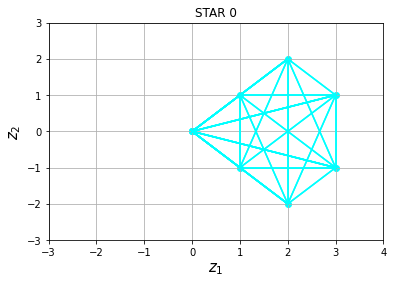

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 - 1.0 * x_2 + 0.0 * x_3 <= 0.0
+ 1.0 * x_0 + 1.0 * x_1 - 1.0 * x_2 + 0.0 * x_3 <= -0.0
- 0.5 * x_0 - 0.5 * x_1 + 1.0 * x_2 + 0.0 * x_3 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 - 1.0 * x_3 <= 0.0
+ 1.0 * x_0 - 1.0 * x_1 + 0.0 * x_2 - 1.0 * x_3 <= -0.0
- 0.5 * x_0 + 0.5 * x_1 + 0.0 * x_2 + 1.0 * x_3 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 1.0 * x_2 + 1.0 * x_3 + 0.0
z_1 = + 0.0 * x_0 + 0.0 * x_1 + 1.0 * x_2 - 1.0 * x_3 + 0.0

STARSET


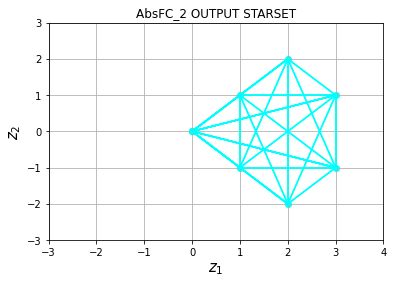

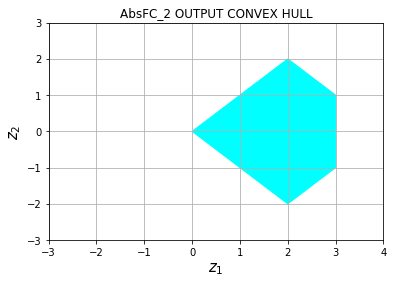



CURRENT NODE: AbsReLU_2

STARS


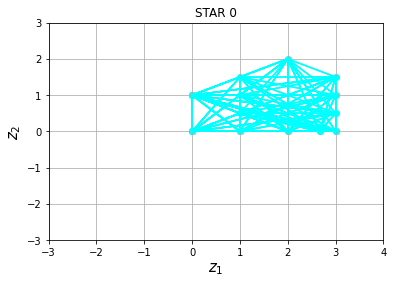

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 - 1.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= 0.0
+ 1.0 * x_0 + 1.0 * x_1 - 1.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= -0.0
- 0.5 * x_0 - 0.5 * x_1 + 1.0 * x_2 + 0.0 * x_3 + 0.0 * x_4 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 - 1.0 * x_3 + 0.0 * x_4 <= 0.0
+ 1.0 * x_0 - 1.0 * x_1 + 0.0 * x_2 - 1.0 * x_3 + 0.0 * x_4 <= -0.0
- 0.5 * x_0 + 0.5 * x_1 + 0.0 * x_2 + 1.0 * x_3 + 0.0 * x_4 <= 1.0
+ 0.0 * x_0 + 0.0 * x_1 + 0.0 * x_2 + 0.0 * x_3 - 1.0 * x_4 <= 0.0
+ 0.0 * x_0 + 0.0 * x_1 + 1.0 * x_2 - 1.0 * x_3 - 1.0 * x_4 <= -0.0
+ 0.0 * x_0 + 0.0 * x_1 - 0.5 * x_2 + 0.5 * x_3 + 1.0 * x_4 <= 0.9999999999999998
VARIABLES EQUATIONS:
z_0 = + 0.0 * x_0 + 0.0 * x_1 + 1.0 * x_2 + 1.0 * x_3 + 0.0 * x_4 +

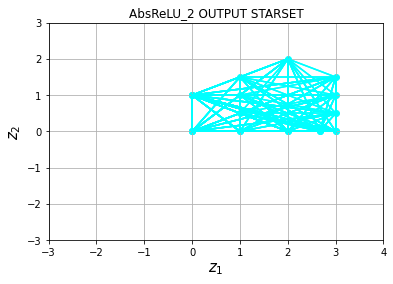

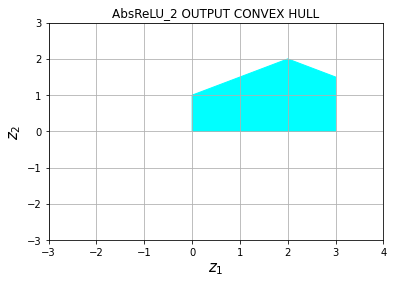

In [3]:
fill_color='aqua'

weight_matrix_1 = np.ones((2, 2))
weight_matrix_2 = np.ones((2, 2))

weight_matrix_1[1, 1] = -1
weight_matrix_2[1, 1] = -1

bias_1 = np.zeros(2)
bias_2 = np.zeros(2)

net_names = ["FC_NET_1_1_1_1"]

neuron_relevance = True
refinement_percentage = 1

final_abstract_hulls = []
for i in range(len(net_names)):

    print("\n" + net_names[i] + "\n")

    abs_net = abst.AbsSeqNetwork(net_names[i])

    abs_net.add_node(
        abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

    abs_net.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "best_n_neurons", [0]))

    abs_net.add_node(
        abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

    abs_net.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "best_n_neurons", [0]))

    C = np.zeros((4, 2))
    C[0, 0] = 1
    C[1, 0] = -1
    C[2, 1] = 1
    C[3, 1] = -1

    d = np.ones((4, 1))
    d[0, 0] = 1
    d[1, 0] = 1
    d[2, 0] = 1
    d[3, 0] = 1

    star = abst.Star(C, d)
    abs_input = abst.StarSet({star})
    current_node = abs_net.get_first_node()

    print("INPUT STARS")
    for star in abs_input.stars:
        plot_star(star, show=True, color=fill_color)
        plt.xlim([-3,4])
        plt.ylim([-3,3])
        plt.xlabel("$z_1$", size=15)
        plt.ylabel("$z_2$", size=15)
        plt.show()
        print_star_data(star)

    print("\nINPUT STARSET")
    plot_starset(abs_input, "INPUT STARSET", color=fill_color)
    plt.xlim([-3,4])
    plt.ylim([-3,3])
    plt.xlabel("$z_1$", size=15)
    plt.ylabel("$z_2$", size=15)
    plt.show()
    plot_convex_hull(get_starset_extreme_points(abs_input), "INPUT", color=fill_color)
    plt.xlim([-3,4])
    plt.ylim([-3,3])
    plt.xlabel("$z_1$", size=15)
    plt.ylabel("$z_2$", size=15)
    plt.savefig("overapproximate_input.pdf")
    plt.show()

    while current_node is not None:
        print(f"\n\nCURRENT NODE: {current_node.identifier}")
        if isinstance(current_node.ref_node, nodes.FullyConnectedNode):
            print(f"WEIGHTS: {current_node.ref_node.weight}")
            print(f"BIAS: {current_node.ref_node.bias}")

        abs_input = current_node.forward_star(abs_input)
        print("\nSTARS")
        n_star = 0
        for star in abs_input.stars:
            plot_star(star, show=True, title=f"STAR {n_star}", color=fill_color)
            plt.xlim([-3,4])
            plt.ylim([-3,3])
            plt.xlabel("$z_1$", size=15)
            plt.ylabel("$z_2$", size=15)
            plt.savefig(f"overapproximate_{current_node.identifier}_STAR={n_star}.pdf")
            plt.show()
            print_star_data(star)
            n_star += 1

        print("\nSTARSET")
        plot_starset(abs_input, current_node.identifier + " OUTPUT STARSET", color=fill_color)
        plt.xlim([-3,4])
        plt.ylim([-3,3])
        plt.xlabel("$z_1$", size=15)
        plt.ylabel("$z_2$", size=15)
        plt.show()
        plot_convex_hull(get_starset_extreme_points(abs_input), 
                         current_node.identifier + " OUTPUT CONVEX HULL", color=fill_color)
        plt.xlim([-3,4])
        plt.ylim([-3,3])
        plt.xlabel("$z_1$", size=15)
        plt.ylabel("$z_2$", size=15)
        plt.savefig(f"overapproximate_chull_{current_node.identifier}.pdf")
        plt.show()
        final_abstract_hulls.append(get_starset_extreme_points(abs_input))
        current_node = abs_net.get_next_node(current_node)

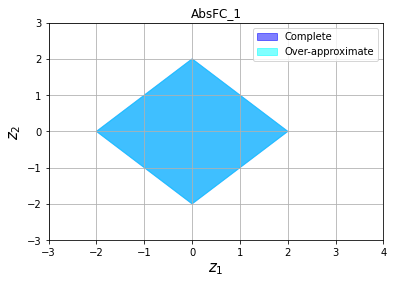

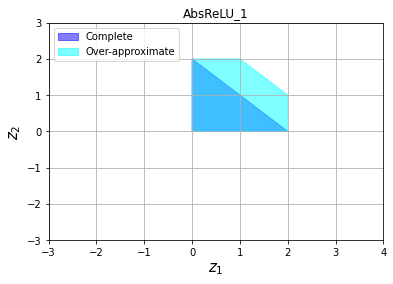

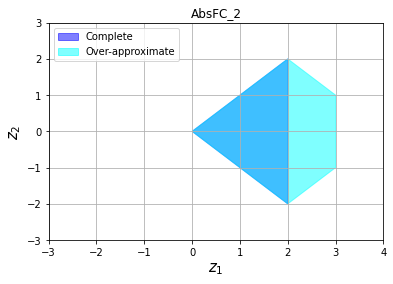

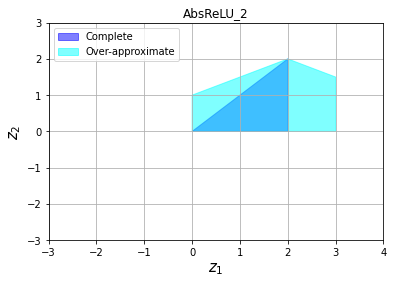

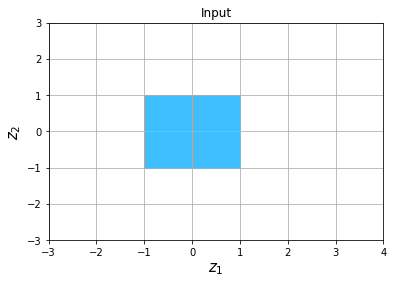

In [4]:
titles = ['AbsFC_1', 'AbsReLU_1', 'AbsFC_2', 'AbsReLU_2']
for i in range(len(final_concrete_hulls)):
    
    plot_convex_hull(final_concrete_hulls[i], color='blue', label="Complete", alpha=0.5)
    plot_convex_hull(final_abstract_hulls[i], color='aqua', label="Over-approximate", alpha=0.5)
    plt.title(titles[i])
    plt.xlabel("$z_1$", size=15)
    plt.ylabel("$z_2$", size=15)
    plt.xlim([-3,4])
    plt.ylim([-3,3])
    plt.grid()
    plt.legend()
    plt.savefig(f"hulls_{i}.pdf")
    plt.show()

in_hull = get_starset_extreme_points(in_starset)
plot_convex_hull(in_hull, color='blue', label="Complete", alpha=0.5)
plot_convex_hull(in_hull, color='aqua', label="Over-approximate", alpha=0.5)
plt.title('Input')
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.grid()
plt.savefig(f"input.pdf")
plt.show()

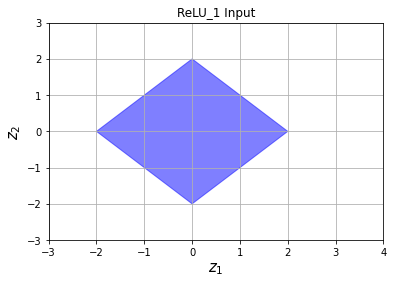

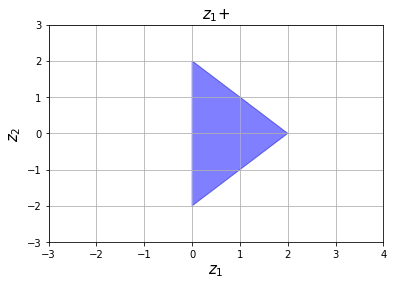

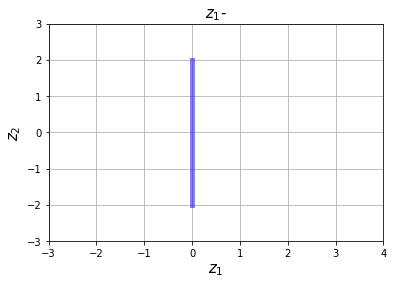

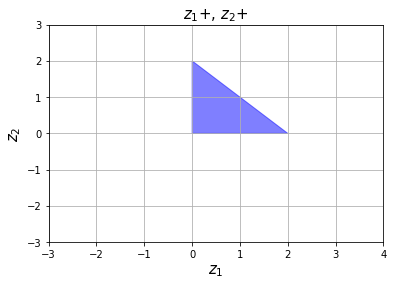

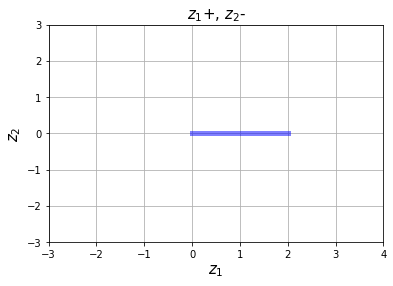

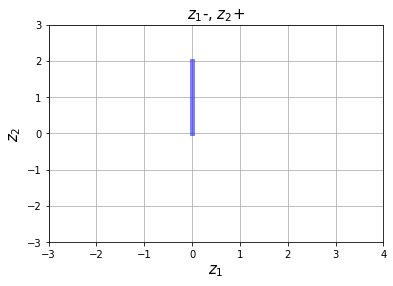

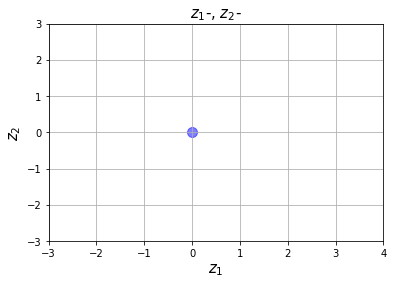

In [10]:
# INPUT RELU1
relu1_input = np.array([[0, -2],[0, 2],[2, 0],[-2, 0]])
plot_convex_hull(relu1_input, color='blue', label="Over-approximate", alpha=0.5)
plt.title('ReLU_1 Input')
plt.grid()
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("ReLU_1_Input.pdf")
plt.show()

# X1 NEURON POSITIVE
relu1_input = np.array([[0, -2],[0, 2],[2, 0]])
plot_convex_hull(relu1_input, color='blue', label="Over-approximate", alpha=0.5)
plt.title("$z_1$+", size=15)
plt.grid()
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("z1pos.pdf")
plt.show()

# X1 NEURON NEGATIVE
plt.plot([0, 0], [-2, 2], alpha=0.5, color='blue', lw=5)
plt.title("$z_1$-", size=15)
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("z1neg.pdf")
plt.show()

# X1+ X2+
relu1_input = np.array([[0, 0],[0, 2],[2, 0]])
plot_convex_hull(relu1_input, color='blue', label="Over-approximate", alpha=0.5)
plt.title("$z_1$+, $z_2$+", size=15)
plt.grid()
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("z1pos2pos.pdf")
plt.show()

# X1+ X2-
plt.plot([0, 2], [0, 0], alpha=0.5, color='blue', lw=5)
plt.title("$z_1$+, $z_2$-", size=15)
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("z1pos2neg.pdf")
plt.show()

# X1- X2+
plt.plot([0, 0], [0, 2], alpha=0.5, color='blue', lw=5)
plt.title("$z_1$-, $z_2$+", size=15)
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("z1neg2pos.pdf")
plt.show()

# X1- X2-
plt.scatter(0, 0, alpha=0.5, color='blue', s=100)
plt.title("$z_1$-, $z_2$-", size=15)
plt.grid()
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.savefig("z1neg2neg.pdf")
plt.show()

INPUT STARS


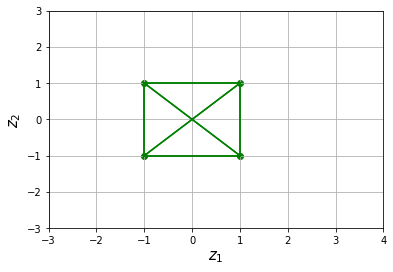

PREDICATE CONSTRAINTS:
+ 1.0 * x_0 + 0.0 * x_1 <= 1.0
- 1.0 * x_0 + 0.0 * x_1 <= 1.0
+ 0.0 * x_0 + 1.0 * x_1 <= 1.0
+ 0.0 * x_0 - 1.0 * x_1 <= 1.0
VARIABLES EQUATIONS:
z_0 = + 1.0 * x_0 + 0.0 * x_1 + 0.0
z_1 = + 0.0 * x_0 + 1.0 * x_1 + 0.0

INPUT STARSET


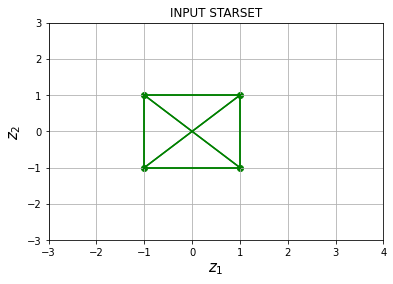

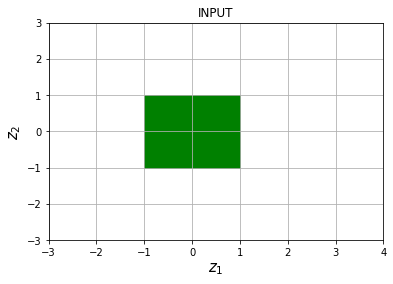

In [6]:
fill_color = 'green'

C = np.zeros((4, 2))
C[0, 0] = 1
C[1, 0] = -1
C[2, 1] = 1
C[3, 1] = -1

d = np.ones((4, 1))
d[0, 0] = 1
d[1, 0] = 1
d[2, 0] = 1
d[3, 0] = 1

star = abst.Star(C, d)
abs_input = abst.StarSet({star})
current_node = abs_net.get_first_node()

print("INPUT STARS")
for star in abs_input.stars:
    plot_star(star, show=True, color=fill_color)
    plt.xlim([-3,4])
    plt.ylim([-3,3])
    plt.xlabel("$z_1$", size=15)
    plt.ylabel("$z_2$", size=15)
    plt.show()
    print_star_data(star)

print("\nINPUT STARSET")
plot_starset(abs_input, "INPUT STARSET", color=fill_color)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.show()
plot_convex_hull(get_starset_extreme_points(abs_input), "INPUT", color=fill_color)
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.savefig("overapproximate_input.pdf")
plt.show()

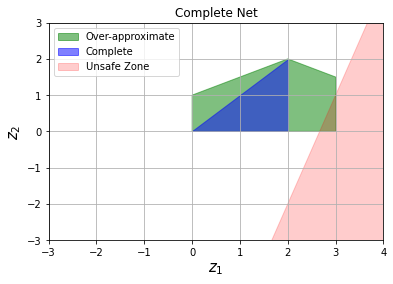

*******************************************************


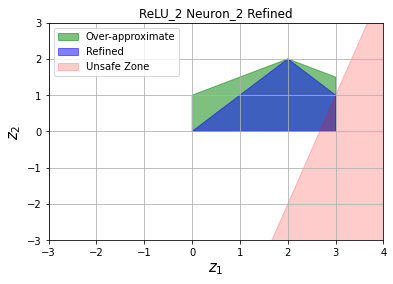

Neuron 0001 RELEVANCE: 1.4279999999999986
Neuron 0001 Qualitative RELEVANCE: 0.008666666666666628

*******************************************************


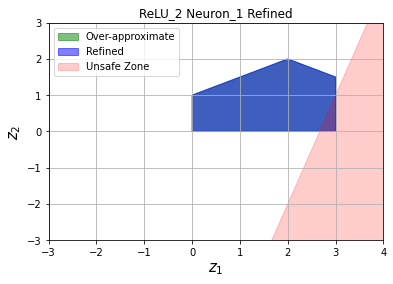

Neuron 0010 RELEVANCE: 0
Neuron 0010 Qualitative RELEVANCE: 0

*******************************************************


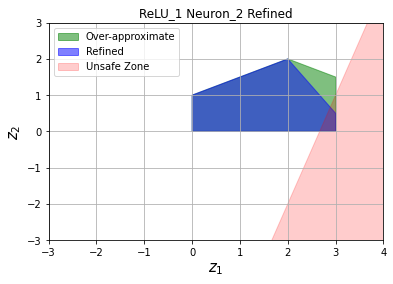

Neuron 0100 RELEVANCE: 0.3119999999999976
Neuron 0100 Qualitative RELEVANCE: 0.01777777777777742

*******************************************************


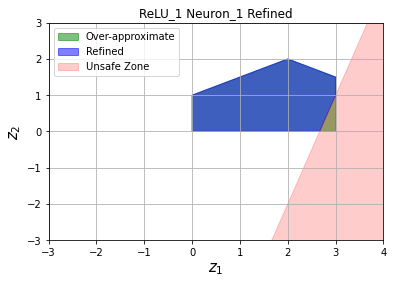

Neuron 1000 RELEVANCE: 0
Neuron 1000 Qualitative RELEVANCE: 0.17199999999999924



In [7]:

C = np.zeros((4, 2))
C[0, 0] = 1
C[1, 0] = -1
C[2, 1] = 1
C[3, 1] = -1

d = np.ones((4, 1))
d[0, 0] = 1
d[1, 0] = 1
d[2, 0] = 1
d[3, 0] = 1

star = abst.Star(C, d)
abs_input = abst.StarSet({star})

fill_color='aqua'

weight_matrix_1 = np.ones((2, 2))
weight_matrix_2 = np.ones((2, 2))

weight_matrix_1[1, 1] = -1
weight_matrix_2[1, 1] = -1

bias_1 = np.zeros(2)
bias_2 = np.zeros(2)

net_names = ["FC_NET_0_0_0_0", "FC_NET_1_1_1_1", "FC_NET_0_0_0_1", "FC_NET_0_0_1_0", "FC_NET_0_1_0_0", "FC_NET_1_0_0_0"]

##################################

abs_net_0000 = abst.AbsSeqNetwork("Over-approximate Net")

abs_net_0000.add_node(
    abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

abs_net_0000.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "best_n_neurons", [0]))

abs_net_0000.add_node(
    abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

abs_net_0000.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "best_n_neurons", [0]))

##################################

abs_net_1111 = abst.AbsSeqNetwork("Complete Net")

abs_net_1111.add_node(
    abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

abs_net_1111.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "best_n_neurons", [10]))

abs_net_1111.add_node(
    abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

abs_net_1111.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "best_n_neurons", [10]))

##################################

abs_net_0001 = abst.AbsSeqNetwork("ReLU_2 Neuron_2 Refined")

abs_net_0001.add_node(
    abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

abs_net_0001.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "given_flags", [[False, False]]))

abs_net_0001.add_node(
    abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

abs_net_0001.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "given_flags", [[False, True]]))

##################################

abs_net_0010 = abst.AbsSeqNetwork("ReLU_2 Neuron_1 Refined")

abs_net_0010.add_node(
    abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

abs_net_0010.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "given_flags", [[False, False]]))

abs_net_0010.add_node(
    abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

abs_net_0010.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "given_flags", [[True, False]]))

##################################

abs_net_0100 = abst.AbsSeqNetwork("ReLU_1 Neuron_2 Refined")

abs_net_0100.add_node(
    abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

abs_net_0100.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "given_flags", [[False, True]]))

abs_net_0100.add_node(
    abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

abs_net_0100.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "given_flags", [[False, False]]))

##################################

abs_net_1000 = abst.AbsSeqNetwork("ReLU_1 Neuron_1 Refined")

abs_net_1000.add_node(
    abst.AbsFullyConnectedNode("AbsFC_1", nodes.FullyConnectedNode("FC_1", (2,), 2, weight_matrix_1, bias_1)))

abs_net_1000.add_node(abst.AbsReLUNode("AbsReLU_1", nodes.ReLUNode("ReLU_1", (2,)), "given_flags", [[True, False]]))

abs_net_1000.add_node(
    abst.AbsFullyConnectedNode("AbsFC_2", nodes.FullyConnectedNode("FC_2", (2,), 2, weight_matrix_2, bias_2)))

abs_net_1000.add_node(abst.AbsReLUNode("AbsReLU_2", nodes.ReLUNode("ReLU_2", (2,)), "given_flags", [[False, False]]))

##################################

unsafe_hull = polytope.qhull(np.array([[0, -8], [5, 7], [10, -8], [15, 7]]))

over_approx_output = abs_net_0000.forward_star(abs_input)
abs_output = abs_net_1111.forward_star(abs_input)
over_approx_hull = polytope.qhull(get_starset_extreme_points(over_approx_output))
output_hull = polytope.qhull(get_starset_extreme_points(abs_output))
plot_convex_hull(over_approx_hull.vertices, color='green', alpha=0.5, label="Over-approximate")
plot_convex_hull(output_hull.vertices, f"{abs_net_1111.identifier}", color='blue', alpha=0.5, label="Complete")
plot_convex_hull(unsafe_hull.vertices, color='red', alpha=0.2, label="Unsafe Zone")
plt.xlim([-3,4])
plt.ylim([-3,3])
plt.xlabel("$z_1$", size=15)
plt.ylabel("$z_2$", size=15)
plt.legend()
plt.savefig(f"{abs_net_1111.identifier}.pdf")
plt.show()

##################################

nets = [abs_net_0001, abs_net_0010, abs_net_0100, abs_net_1000]
neuron_id = ['0001', '0010', '0100', '1000']
n_idx = 0

#Unsafe Zone: y <= 3x - 8

for net in nets:
    
    print("*******************************************************")
    over_approx_output = abs_net_0000.forward_star(abs_input)
    abs_output = net.forward_star(abs_input)
    over_approx_hull = polytope.qhull(get_starset_extreme_points(over_approx_output))
    output_hull = polytope.qhull(get_starset_extreme_points(abs_output))
    plot_convex_hull(over_approx_hull.vertices, color='green', alpha=0.5, label="Over-approximate")
    plot_convex_hull(output_hull.vertices, title=f"{net.identifier}", color='blue', alpha=0.5, label="Refined")
    plot_convex_hull(unsafe_hull.vertices, color='red', alpha=0.2, label="Unsafe Zone")
    plt.xlim([-3,4])
    plt.ylim([-3,3])
    plt.xlabel("$z_1$", size=15)
    plt.ylabel("$z_2$", size=15)
    plt.legend()
    plt.savefig(f"{net.identifier}.pdf")
    plt.show()
    
    unsafe_over_intersect = over_approx_hull.intersect(unsafe_hull)
    tot_intersect = unsafe_over_intersect.intersect(output_hull)
    
    print(f'Neuron {neuron_id[n_idx]} RELEVANCE: {max(0, over_approx_hull.volume - output_hull.volume)}')
    print(f'Neuron {neuron_id[n_idx]} Qualitative RELEVANCE: {max(0, unsafe_over_intersect.volume - tot_intersect.volume)}\n')
    n_idx = n_idx + 1

In [8]:
C = np.zeros((4, 2))
C[0, 0] = 1
C[1, 0] = -1
C[2, 1] = 1
C[3, 1] = -1

d = np.ones((4, 1))
d[0, 0] = 1
d[1, 0] = 1
d[2, 0] = 1
d[3, 0] = 1

star = abst.Star(C, d)
abs_input = abst.StarSet({star})

conc_net = networks.SequentialNetwork("prova", "input")

current_node = abs_net_0000.get_first_node()
n_areas = []
while current_node is not None:
    
    abs_input = current_node.forward_star(abs_input)
    conc_net.add_node(current_node.ref_node)
    
    if isinstance(current_node, abst.AbsReLUNode):
        n_areas.append(current_node.n_areas)
        
    current_node = abs_net_0000.get_next_node(current_node)
    

lrp_a = ver.LRPAnalyzer()
py_net = conv.PyTorchConverter().from_neural_network(conc_net).pytorch_network
    
print(utils.input_search(conc_net, np.array([2.8, 0.5]), np.array([0.5, 0.25]), 1000, 0.05))
rel = lrp_a.analyze(conc_net, np.array([1.4, 0.25], dtype='float64'))
print(rel[1:])
print(n_areas)

Current Input: tensor([0.6000, 0.2500], dtype=torch.float64, requires_grad=True)
Current Output: tensor([[1.2000, 0.5000]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)
Current Input: tensor([0.7000, 0.2500], dtype=torch.float64, requires_grad=True)
Current Output: tensor([[1.4000, 0.5000]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)
Current Input: tensor([0.8000, 0.2500], dtype=torch.float64, requires_grad=True)
Current Output: tensor([[1.6000, 0.5000]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)
Current Input: tensor([0.9000, 0.2500], dtype=torch.float64, requires_grad=True)
Current Output: tensor([[1.8000, 0.5000]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)
Current Input: tensor([1.0000, 0.2500], dtype=torch.float64, requires_grad=True)
Current Output: tensor([[2.0000, 0.5000]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)
Current Input: tensor([1.1000, 0.2500], dtype=torch.float64, requires_grad=True)
Current Output: tensor([[2.2000, 0.5000]], d

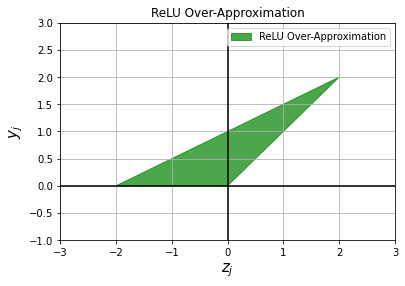

In [9]:
overapprox = polytope.qhull(np.array([[0, 0], [-2, 0], [2, 2]]))

plot_convex_hull(overapprox.vertices, color='green', alpha=0.7, label="ReLU Over-Approximation", title="ReLU Over-Approximation")
plt.xlim([-3,3])
plt.ylim([-1,3])
plt.xlabel("$z_j$", size=15)
plt.ylabel("$y_j$", size=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.savefig(f"ReLU Overapprox.pdf")
plt.show()

We need 3 constraints for the over-approximation:

1) $y_j \geq 0$  
2) $y_j \geq z_j$  
3) $y_j \leq ub_j \cdot \frac{z_j - lb_j}{ub_j - lb_j}$  

The constraints must be added to the predicate matrix of the star, therefore we define an auxiliarly variable $x_{m+1}$ and we modify the basis matrix so that $y_j = x_{m+1}$.
We remember that $z_j = V_j \mathbf{x} + c_j$, substituting it in the constraints we obtain:

1) $x_{m+1} \geq 0$  
2) $x_{m+1} \geq V_j \mathbf{x} + c_j$  
3) $x_{m+1} \leq ub_j \cdot \frac{V_j \mathbf{x} + c_j - lb_j}{ub_j - lb_j}$  

We shuffle a bit the constraints to bring them in the format $C\mathbf{x} \leq \mathbf{d}$:

1) $- x_{m+1} \leq 0$  
2) $V_j \mathbf{x} - x_{m+1} \leq -c_j$  
3) $- \frac{ub_j}{ub_j-lb_j} V_j \mathbf{x} + x_{m+1} \leq \frac{ub_j}{ub_j-lb_j}(c_j - l_j)$  

The resulting matrixes C_1, C_2 and C_3 and biases d_1, d_2, d_3 are:

1) $C_1 = [0\ 0\ 0\ ...\ -1] \in \mathbb{R}^{1 \times m+1},\quad d_1 = 0$  
2) $C_2 = [V_j\quad -1] \in \mathbb{R}^{1 \times m+1},\quad d_2 = -c_j$  
3) $C_3 = [- \frac{ub_j}{ub_j-lb_j} V_j\quad 1] \in \mathbb{R}^{1 \times m+1},\quad d_3 = \frac{ub_j}{ub_j-lb_j}(c_j - l_j)$  